<a href="https://colab.research.google.com/github/DevanshA2511/Netflix-Movies-And-TV-Shows-Clustering-Project/blob/main/Netflix_Movies_And_TV_Shows_Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies And TV Shows Clustering Project



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**         - Devansh Saini

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/DevanshA2511/Netflix-Movies-And-TV-Shows-Clustering-Project

# **Problem Statement**


This project's primary objective is to employ unsupervised learning methods for the purpose of categorizing Netflix movies and TV shows that share similarities. By examining a dataset containing information about Netflix titles, including attributes like genre, release year, cast, and plot summary, the ultimate goal is to organize these titles into clusters utilizing algorithms such as K-Means or Hierarchical clustering.

The overarching aim is to create a clustering model that effectively groups Netflix titles based on their distinctive features. This model has the potential to enhance the content recommendation system and elevate the content discovery experience for Netflix users.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline


### Dataset Loading

In [3]:
# Load Dataset
# import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/data /NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count

row_count = df.shape[0]  # Returns number of rows
print(f"No. of Rows : {row_count}")
col_count = df.shape[1]  # Returns number of columns
print(f'No. of Columns : {col_count}')

No. of Rows : 7787
No. of Columns : 12


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
duplicates = sum(df.duplicated())
print(f'No. of duplicate values in dataset are {duplicates}')

No. of duplicate values in dataset are 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
total_null = df.isna().sum().sum()
print(f'Total Null values present are : {total_null}')
df.isna().sum().sort_values(ascending = False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

Total Null values present are : 3631


,Columns,Null values
0,director,2389
1,cast,718
2,country,507
3,date_added,10
4,rating,7
5,show_id,0


<Axes: >

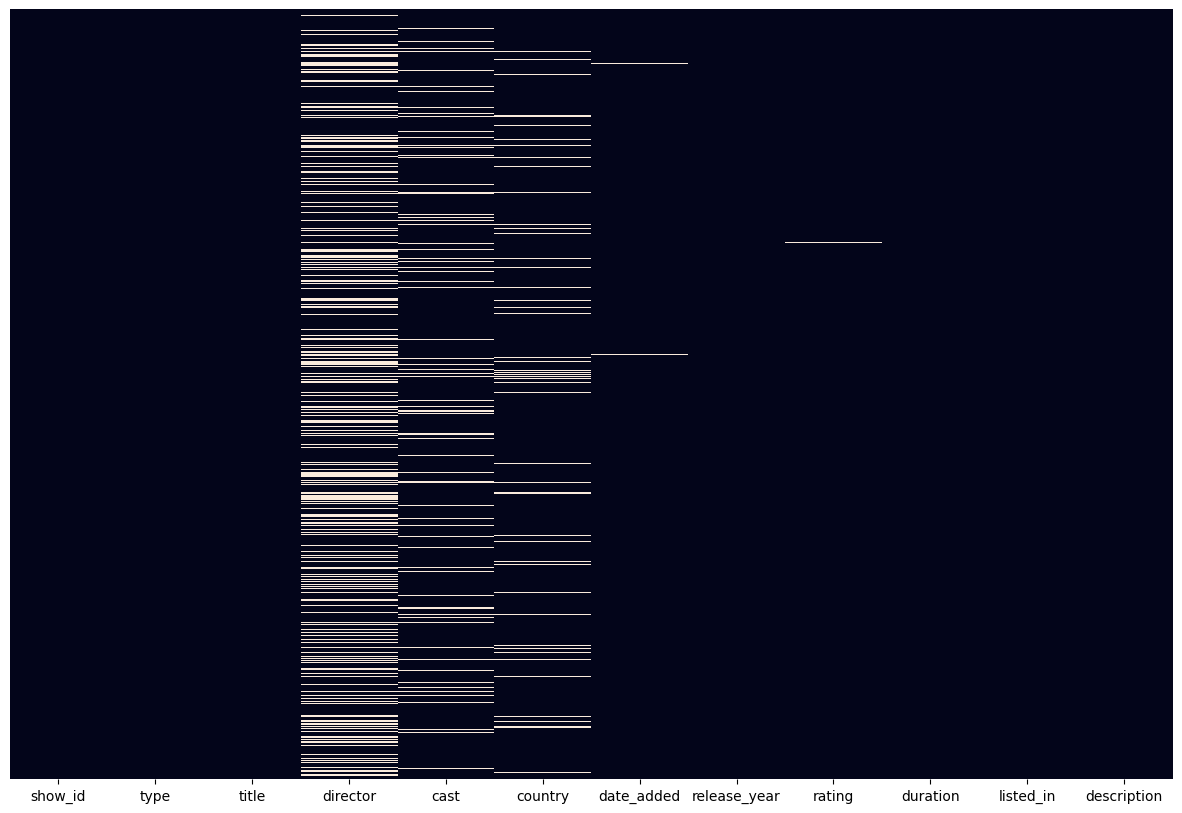

In [11]:
# Visualizing the missing values
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(),cbar = False, yticklabels = False)

### What did you know about your dataset?

*From the above heatmap and data analysis i can say that:*
1. There are 7787 rows and 12 coloumns in the dataset.

2. A total of 0 ***duplicate*** values are present in the dataset.

3. A total of 3631 ***Null*** values are present in the dataset

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
print(list(df.columns))

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [13]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

**show_id** : Unique ID for every Movie / Tv Show

**type** : Identifier - A Movie or TV Show

**title** : Title of the Movie / Tv Show

**director** : Director of the Movie

**cast** : Actors involved in the movie / show

**country** : Country where the movie / show was produced

**date_added** : Date it was added on Netflix

**release_year** : Actual Releaseyear of the movie / show

**rating** : TV Rating of the movie / show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Genere

**description** : The Summary description

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

In [16]:
print('Percentage Of Missing Data')
print(round(df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)/len(df)*100,2))

Percentage Of Missing Data
director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64


* The missing values in the 'director', 'cast', and 'country' columns can be replaced with the label 'Unknown'.

In [17]:
df[['director']] = df[['director']].fillna('Unknown')
df[['cast']]     = df[['cast']].fillna('Unknown')
df[['country'] ] = df[['country']].fillna('Unknown')

* Given that we cannot impute missing values in the 'date_added' column, and these missing entries represent a small and relatively insignificant portion of the dataset, we will opt to omit these values from our analysis.

In [18]:
df.dropna(subset=['date_added'], inplace=True)

* To address the absence of values in the 'rating' column, we can utilize the mode as a means of imputation, as this attribute is categorical in nature.

In [19]:
df['rating'].fillna(value=df['rating'].mode()[0],inplace=True)

In [69]:
# Define a mapping dictionary to convert current ratings to new ratings
rating_dict = {
    'TV-MA': 'Adults',
    'R': 'Adults',
    'PG-13': 'Teens',
    'TV-14': 'Young Adults',
    'TV-PG': 'Older Kids',
    'NR': 'Adults',
    'TV-G': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'NC-17': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'UR': 'Adults'
}

# Replace the current ratings with the new ratings using the mapping dictionary
df['rating'].replace(rating_dict, inplace=True)

# Print the unique values in the 'rating' column to verify the changes
unique_ratings = df['rating'].unique()
print("Unique ratings after mapping:")
print(unique_ratings)


Unique ratings after mapping:
['Adults' 'Teens' 'Young Adults' 'Older Kids' 'Kids']


* Modifying the 'duration' column in the dataframe by dividing the string values using a space delimiter and subsequently converting them into integers.

In [70]:
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))
# datatype of duration
df.duration.dtype

dtype('int64')

* Choosing the primary country and primary genre for each entry in the dataframe, to simplifiy the data for subsequent analysis.

In [71]:
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [72]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

### What all manipulations have you done and insights you found?

1. Used 'unknown' to fill missing values in director , cast and country.

2. Filling missing null values in 'rating' with mode.

3. Made new ratings to simply data analysis

4. Modifying the 'duration' column in the dataframe by dividing the string values using a space delimiter and subsequently converting them into integers.

5. Choosing the primary country and primary genre for each entry in the dataframe, to simplifiy the data for subsequent analysis.

6. Converting timestamp into datetime format and making new columns month_added and year_added.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   int64         
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
 12  year_added    7777 non-null   int64         
 13  month_added   7777 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 911.4+ KB


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis**

#### Chart - 1: Which country has the most titles?

The top 3 countries account for 56.69% of shows in the dataset.
The top 10 countries account for 73.19% of shows in the dataset.


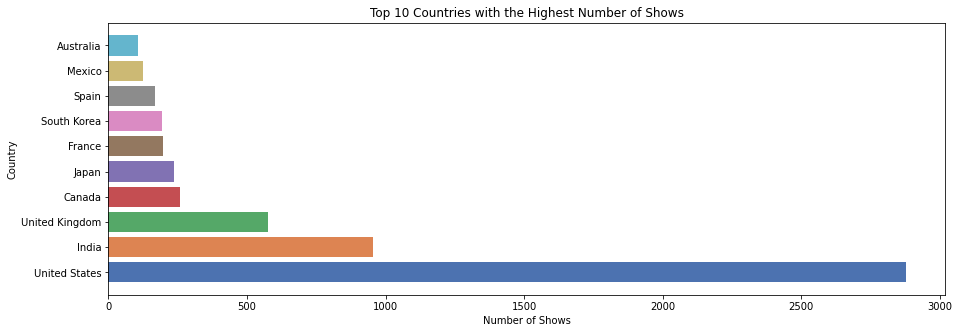

In [ ]:
# Chart - 1 visualization code
# Get the top 10 countries with the highest number of movies and TV shows in the dataset
top_countries = df.loc[df['country'] != 'Unknown', 'country'].value_counts().nlargest(10)
plt.figure(figsize=(15,5))
colors = sns.color_palette('deep', n_colors=10)
plt.barh(top_countries.index, top_countries.values, color=colors) # Plot a horizontal bar chart
plt.title('Top 10 Countries with the Highest Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')

In [ ]:
# Calculate the percentage share of shows by the top 3 and top 10 countries
top_3_share = top_countries.nlargest(3).sum() / len(df) * 100
top_10_share = top_countries.sum() / len(df) * 100

# Print the percentage shares
print(f"The top 3 countries account for {top_3_share:.2f}% of shows in the dataset.")
print(f"The top 10 countries account for {top_10_share:.2f}% of shows in the dataset.")

The top 3 countries account for 56.69% of shows in the dataset.
The top 10 countries account for 73.19% of shows in the dataset.


##### 1. Why did you pick the specific chart?

I selected this chart because it displays the top 10 countries with the most extensive collection of movies and TV shows in the dataset, which holds significant relevance for any company considering entry into or expansion within the global streaming industry.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates that the United States stands out as the most prolific producer of movies and TV shows within the dataset, boasting a total of over 2,500 titles. Following closely are India, the United Kingdom, and Canada, each contributing roughly between 500 and 1,000 titles. Other notable countries within the top 10 include France, Japan, and Spain. It's noteworthy that the top three countries, namely the USA, India, and the UK, collectively represent 56.69% of the shows in the dataset, while the top 10 countries collectively contribute to 73.19% of the total shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart clearly illustrates that the United States stands out as the most prominent producer of both movies and TV shows in the dataset, with an impressive tally of over 2,500 titles. Following closely behind are India, the United Kingdom, and Canada, each making substantial contributions ranging from approximately 500 to 1,000 titles. Additionally, noteworthy mentions within the top 10 list encompass countries like France, Japan, and Spain. It's worth highlighting that the top three countries, specifically the USA, India, and the UK, jointly account for 56.69% of the shows in the dataset, while the cumulative contribution of the top 10 countries reaches 73.19% of the total shows.

#### Chart - 2: Which year had the most titles released?

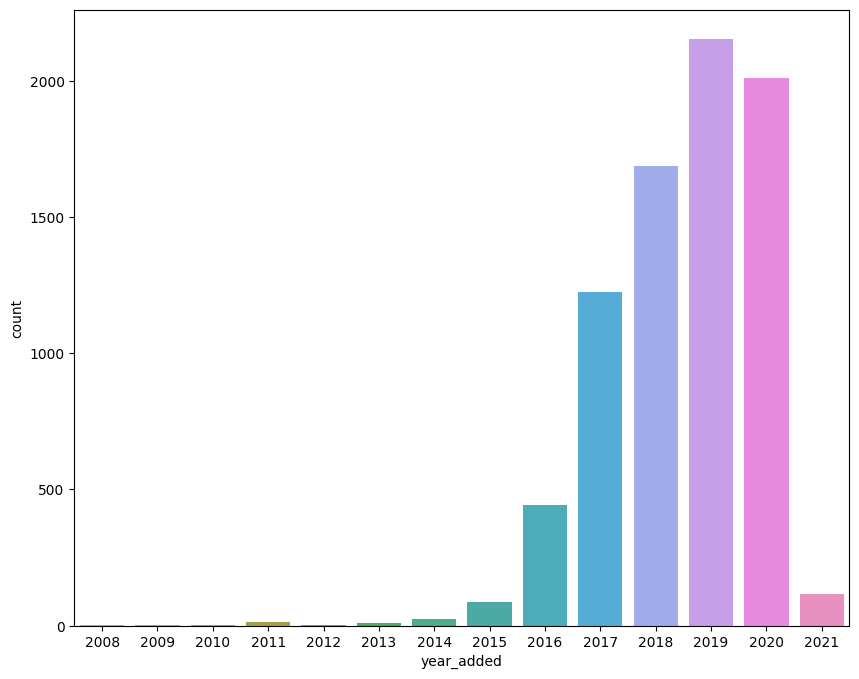

In [80]:
# Chart - 2 visualization code
# Plotting the Countplot

plt.figure(figsize=(10, 8))

# Use sns.countplot to create the countplot
ax = sns.countplot(data=df, x='year_added')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

This visual representation is a count plot that depicts the yearly additions of both TV shows and movies to Netflix, based on the dataset. The code employs the seaborn library to generate this graphical representation.

##### 2. What is/are the insight(s) found from the chart?

2018, 2019 and 2020 had the most number of released titles with most in 2019.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows the rapid growth of titles over the past three years which shows postive growth.

#### Chart - 3: What rating category has the highest number of titles?

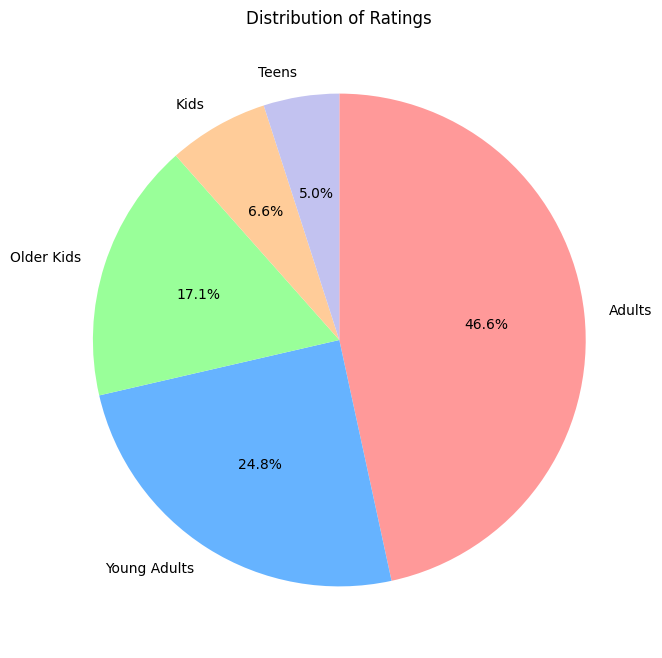

In [81]:
# Chart - 3 visualization code
# Getting the value counts for the 'rating' column
df_rating = df['rating'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb366']

# Creating a pie chart with the lighter colors
plt.figure(figsize=(8, 8))
plt.pie(df_rating.values, labels=df_rating.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors)

# Adding a title to the chart
plt.title('Distribution of Ratings')

# Displaying the pie chart
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are effective for showing the proportion of data within different categories, which is exactly what this chart aims to show.

##### 2. What is/are the insight(s) found from the chart?

This chart provides insights into the Netflix dataset, revealing that the most prevalent rating category is 'Adults' (TV-MA - Mature Audiences), comprising nearly 47% of all titles. Following closely are 'Young Adults' (TV-14 - Parents Strongly Cautioned) and 'Older Kids' (TV-PG - Parental Guidance Suggested), accounting for approximately 25% and 17% of the titles, respectively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These findings have the potential to generate a favorable business influence by guiding decisions regarding content procurement and production. For instance, the prevalence of TV-MA ratings indicates a robust demand for mature content on the platform, offering valuable insights for content acquisition and creation strategies.

#### Chart - 4: Which genre has the most titles?

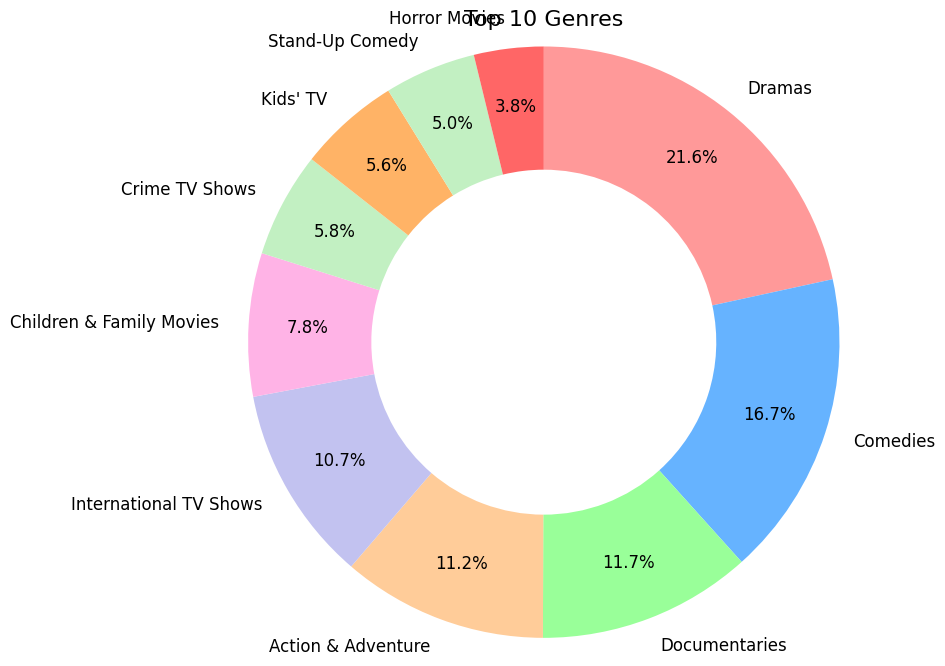

In [82]:
# Chart - 4 visualization code

# Getting the top 10 genres by their counts
top_genres = df["listed_in"].value_counts().head(10)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb366', '#c2f0c2', '#ff6666']

# Creating a pie chart with specified attributes
plt.figure(figsize=(8, 8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1,
        radius=1.2, wedgeprops=dict(width=0.5), startangle=90,
        textprops=dict(color="black", fontsize=12), counterclock=False, colors=colors)

# Adding a title to the chart
plt.title('Top 10 Genres', fontsize=16)

# Displaying the pie chart
plt.show()


##### 1. Why did you pick the specific chart?

I selected the pie chart as it offers an effective means of visually representing the distribution of categorical data. In this instance, we are utilizing it to depict the distribution of the top 10 genres within the Netflix dataset.

##### 2. What is/are the insight(s) found from the chart?

The pie chart provides a visual breakdown of the percentage distribution for each of the top 10 genres in the dataset. From this chart, we discern that the most prevalent genre is dramas, closely trailed by comedies and documentaries. Additionally, it's evident that these top 10 genres collectively constitute a substantial portion of the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights derived from this chart have the potential to foster a positive impact on Netflix's business strategy by offering a deeper understanding of their audience's content preferences. Armed with this knowledge, Netflix can make more informed choices regarding content acquisition and production, ultimately boosting viewership and revenue.

#### Chart - 5: Which type of titles are more prevelant?

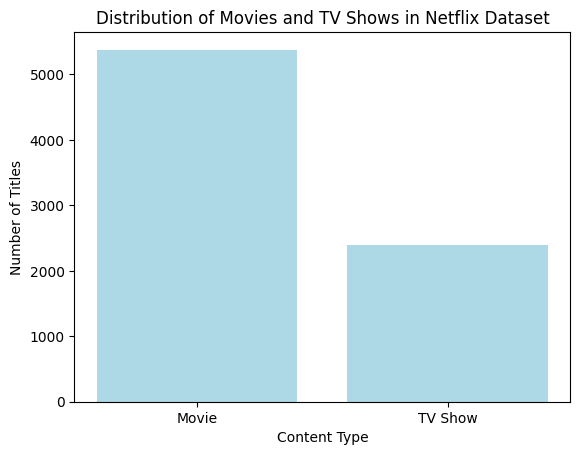

In [84]:
# Chart - 5 visualization code

# Counting the occurrences of each unique value in the 'type' column
type_counts = df['type'].value_counts()

# Creating a bar chart of the type counts with light blue color
plt.bar(type_counts.index, type_counts.values, color='lightblue')

# Adding labels and a title to the chart
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.title('Distribution of Movies and TV Shows in Netflix Dataset')

# Displaying the bar chart
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart serves as a widely used and suitable option for presenting the distribution of categorical data, as exemplified by the count of movies and TV shows in the Netflix dataset. It facilitates straightforward comparisons between different categories and offers a visually intuitive representation of the content type distribution within the dataset. Consequently, for this particular dataset and research inquiry, a bar chart is a fitting and effective choice.

##### 2. What is/are the insight(s) found from the chart?

* The Netflix dataset predominantly consists of movies, with a notably higher count compared to TV shows.

* This distribution disparity between movies and TV shows in the dataset implies a preference for movies within Netflix's content catalog.

* Nonetheless, the dataset still contains a substantial number of TV shows, highlighting Netflix's substantial investment in both producing and procuring TV show content for its platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights extracted from this chart could potentially yield a favorable business impact for Netflix. The awareness that a majority of the content in the Netflix dataset comprises movies and that Netflix exhibits a preference for this content type could influence strategic decisions related to content production and acquisition. For example, Netflix might opt to allocate greater resources toward creating and acquiring movies to enhance its appeal to viewers and subscribers.

#### Chart - 6: Which cast members enjoy the highest level of popularity?

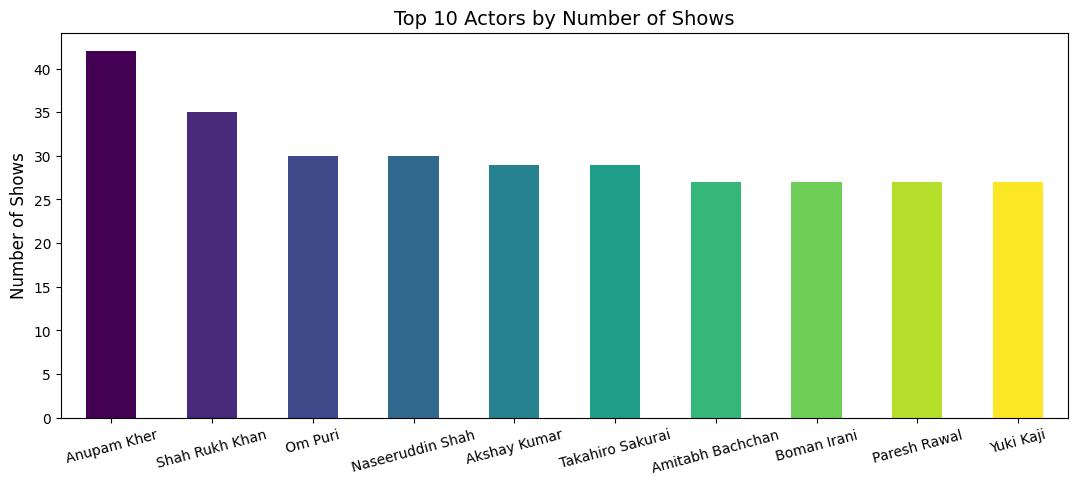

In [85]:
# Chart - 6 visualization code
import matplotlib.pyplot as plt
import numpy as np

# Filtering out rows where the cast is not 'Unknown'
filtered_df = df[~(df['cast'] == 'Unknown')]

# Splitting the remaining cast into separate values
split_cast = filtered_df['cast'].str.split(', ', expand=True)

# Stacking the cast values and count the top 10 actors by the number of shows
cast_values = split_cast.stack()
top_10_actors = cast_values.value_counts().nlargest(10)

# Define a color palette for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_actors)))

# Creating a bar chart with different colors for each bar
top_10_actors.plot(kind='bar', figsize=(13, 5), color=colors)

# Setting chart title and labels
plt.title('Top 10 Actors by Number of Shows', fontsize=14)
plt.ylabel('Number of Shows', fontsize=12)
plt.xticks(rotation=15)

# Displaying the bar chart
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart showcasing the top 10 actors based on their Netflix show appearances. This chart is ideal for examining the actor-show relationship and offers valuable insights into the platform's most popular actors.

##### 2. What is/are the insight(s) found from the chart?

The chart offers valuable insights into Netflix's most popular actors:

*  Anupam Kher leads with 42 show appearances, making him the top actor by count.

*  Shah Rukh Khan follows closely with 35 show appearances, securing the second position.

*  Notably, most of the top 10 actors have featured in a range of 25 to 30 shows on Netflix.

*  The majority of these top 10 actors hail from India, except for Takahiro Sakurai and Yuki Kaji, who represent Japan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Recognizing the platform's top actors allows Netflix to source or create content featuring these actors, potentially boosting viewership and engagement.

*  These insights aid in pinpointing target demographics for various titles, as distinct actors may cater to diverse audience segments.

*  The data additionally assists Netflix in discerning user preferences and trends, informing decisions regarding content acquisition and production.

#### Chart - 7: Which director boasts the highest number of titles?

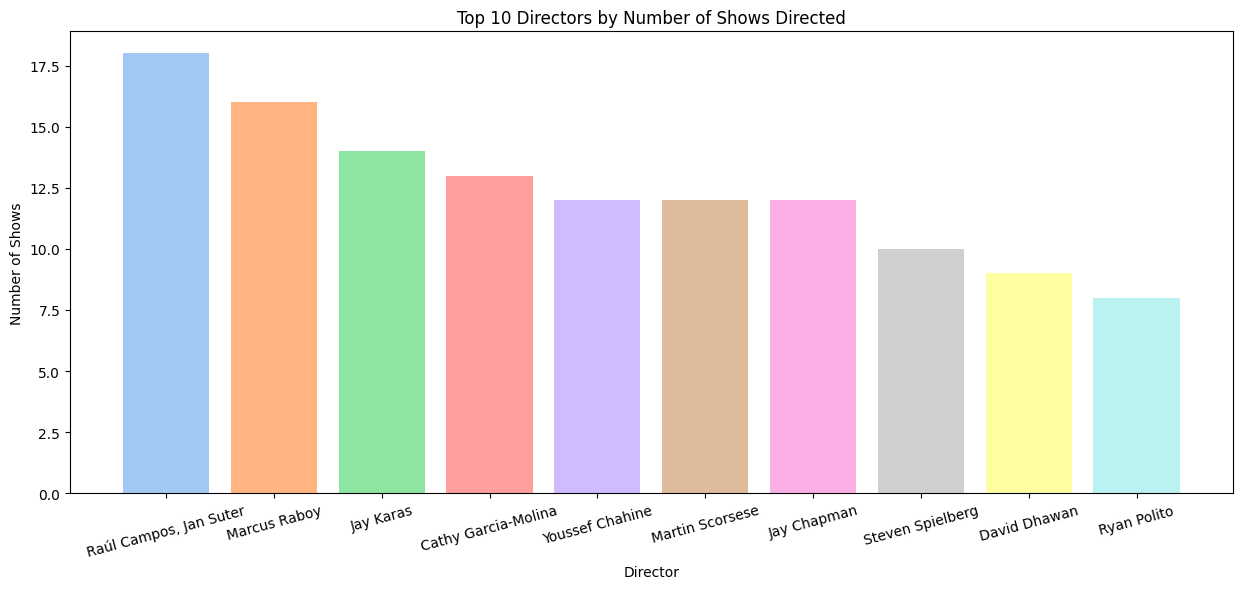

In [86]:
# Chart - 7 visualization code
# Filtering out rows where the director is not 'Unknown', count the number of shows for each director, and get the top 10 directors
top_directors = df.loc[df['director'] != 'Unknown', 'director'].value_counts().nlargest(10)

# Creating a figure for the plot with a specific size
plt.figure(figsize=(15, 6))

# Defining colors for the bars using a pastel color palette
colors = sns.color_palette('pastel', n_colors=10)

# Creating a bar chart with the top directors
plt.bar(top_directors.index, top_directors.values, color=colors)

# Setting chart title and labels
plt.title('Top 10 Directors by Number of Shows Directed')
plt.xlabel('Director')
plt.ylabel('Number of Shows')
plt.xticks(rotation=15)

# Displaying the bar chart
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart presenting the top 10 directors based on the number of shows they directed in the Netflix dataset. This chart is suitable for exploring the director-show relationship, offering insights into Netflix's most popular directors. The color scheme enhances visual appeal and readability.

##### 2. What is/are the insight(s) found from the chart?

*  Raul Campos and Jan Suter lead as top directors, each having directed 18 shows in the dataset.

*  Following closely, Marcus Raboy ranks as the second most popular director with 16 shows.

*  Notably, the majority of the top 10 directors have helmed between 7 to 11 shows on Netflix.

*  Among the top 10 directors, the majority hail from the United States, with the exception of David Dhawan from India, who directed 9 shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights could aid in shaping decisions regarding content creation and procurement, as they furnish valuable information about Netflix's most renowned directors and their previous contributions.

### **Bivariate Analysis**

#### Chart - 8: How does the type of content relate to the year of release?

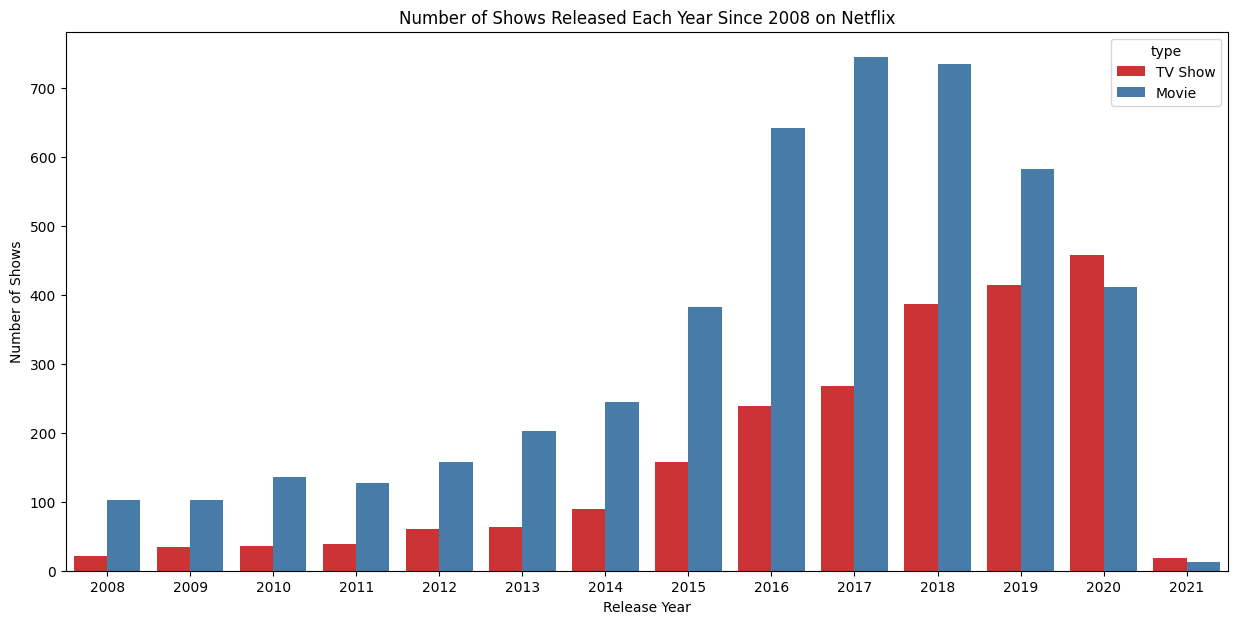

In [90]:
# Chart - 8 visualization code
# Creating a filtered DataFrame with release years greater than or equal to 2008
filtered_df = df[df['release_year'] >= 2008]

# Creating a figure for the plot with a specific size
plt.figure(figsize=(15, 7))

# Using seaborn's countplot to visualize the relationship between release year and content type
sns.countplot(x='release_year', data=filtered_df, hue='type', order=range(2008, 2022), palette='Set1')

# Adding labels and a title to the chart
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Number of Shows Released Each Year Since 2008 on Netflix')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

I selected this chart because it illustrates the evolving trend in the annual release of shows on Netflix since 2008. Additionally, it effectively highlights the disparity between the number of movies and TV shows released each year.

##### 2. What is/are the insight(s) found from the chart?

*  TV show releases have shown a consistent upward trend since 2008.

*  TV show releases have exhibited a relatively stable pattern with occasional fluctuations.

*  The gap between movie and TV show releases has widened over time, suggesting a growing emphasis on original movie content within Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights have the potential to generate a favorable business impact by offering valuable information about Netflix's content production trend. This understanding can inform strategic decisions regarding the nature and volume of future content production.

Notably, there are no indications of negative growth within this chart.

#### Chart - 9: How does the cast relate to TV shows?

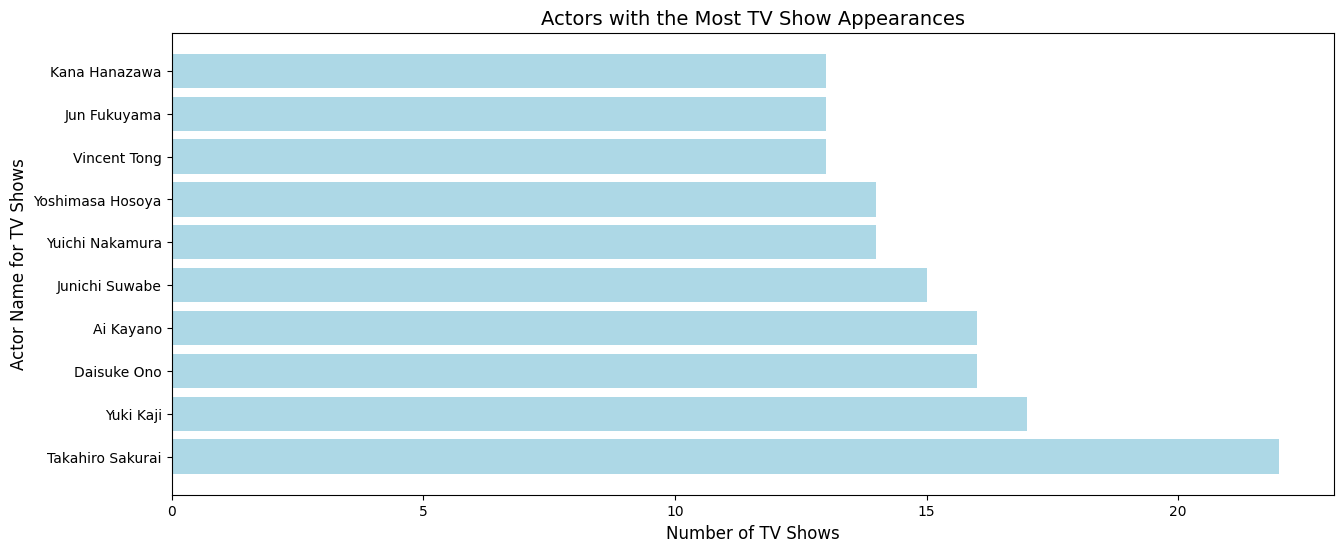

In [91]:
# Chart - 9 visualization code

# Selecting TV shows with known cast information
tv_shows = df[(df['type'] == 'TV Show') & ~(df['cast'] == 'Unknown')]

# Counting the number of TV shows each actor has appeared in
actor_counts = tv_shows['cast'].str.split(', ').explode().value_counts()

# Selecting the top 10 actors with the most TV show appearances
top_actors = actor_counts.head(10)

# Creating a horizontal bar plot of the top actors
plt.figure(figsize=(15, 6))
plt.barh(top_actors.index, top_actors.values, color='lightblue')

# Adding labels and a title to the chart
plt.xlabel('Number of TV Shows', fontsize=12)
plt.ylabel('Actor Name for TV Shows', fontsize=12)
plt.title('Actors with the Most TV Show Appearances', fontsize=14)

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

This horizontal bar chart visually represents the top 10 actors with the highest number of TV show appearances. It serves as a valuable tool for grasping which actors are most frequently chosen for TV roles. This information can be particularly relevant to individuals in the entertainment sector or those intrigued by popular culture.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the top 10 actors who have appeared in the most TV shows on Netflix. The insight gained from the chart is that Takahiro Sakurai has appeared in the most TV shows on Netflix, followed by Yuki kaji and Daisuke Ono. These insights could be used to identify popular actors that could potentially draw in audiences for new TV show releases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights have the potential to generate a favorable business impact by enhancing the process of selecting actors for TV shows. Casting popular actors can potentially draw a larger viewership, thereby benefiting the business. However, it's essential to recognize that an actor's popularity alone doesn't guarantee success, as the quality of the TV show also plays a pivotal role in its reception and success.

#### Chart - 10: How is the relationship between the country and show ID defined?

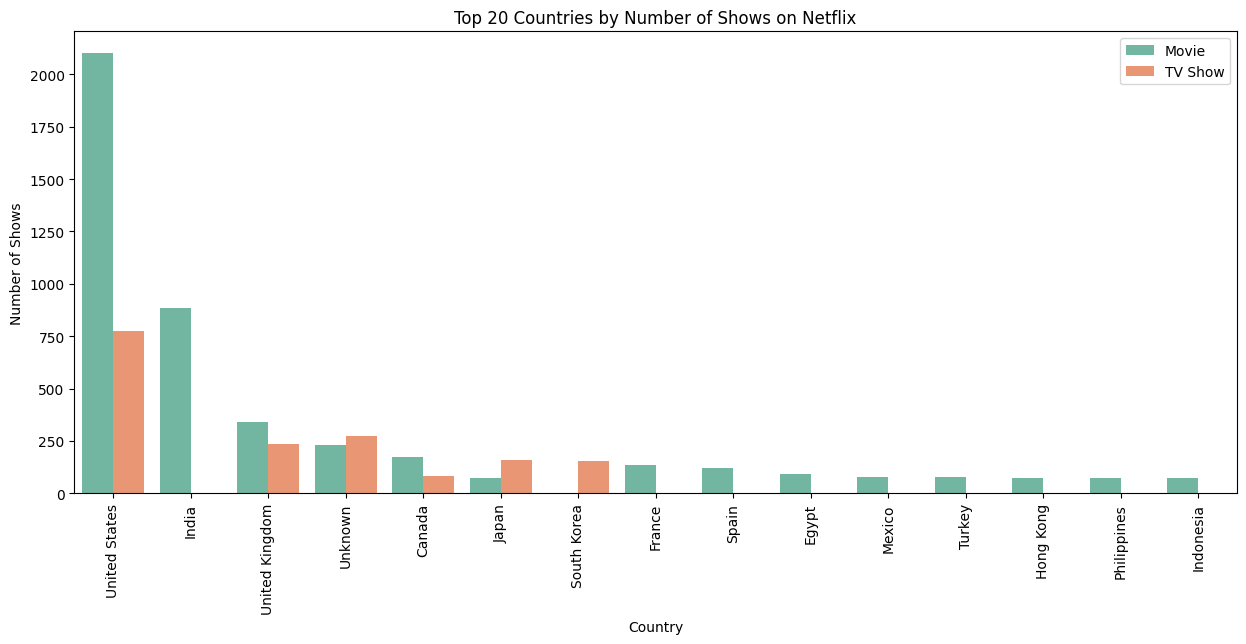

In [92]:
# Chart - 10 visualization code
# Grouping the data by country and type, and count the number of shows
df_country = df.groupby(['country', 'type'])['show_id'].count().reset_index()

# Sorting the data in descending order based on the number of shows
df_country = df_country.sort_values(by='show_id', ascending=False)

# Creating a figure for the plot with a specific size
plt.figure(figsize=(15, 6))

# Using seaborn's barplot to visualize the top 20 countries
sns.barplot(data=df_country[:20], x='country', y='show_id', hue='type', palette='Set2')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Adding a legend to the upper right
plt.legend(loc='upper right')

# Setting chart title and labels
plt.title('Top 20 Countries by Number of Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Shows')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected for its ability to offer insights into the top 20 countries with the most extensive Netflix content libraries, categorized by country and show type. It serves as a valuable resource for identifying countries with abundant content, potentially informing decisions related to content acquisition and localization strategies.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly illustrates that the United States stands out with the largest content library on Netflix, boasting over 2,000 shows. India follows closely with over 800 shows, while the United Kingdom offers more than 300 shows. Moreover, it's evident that in these countries, the majority of the available content consists of movies, except for the United Kingdom, which features a relatively balanced distribution between movies and TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indeed, these insights can positively impact business decisions related to content acquisition and localization. For instance, to expand content libraries in specific regions, companies can prioritize acquiring content from countries with the most extensive libraries, as revealed by this chart. Additionally, it can inform localization strategies like dubbing or subtitling for high-content countries, attracting more viewers and bolstering revenue.

#### Chart - 11: How does the release year relate to the type of content?

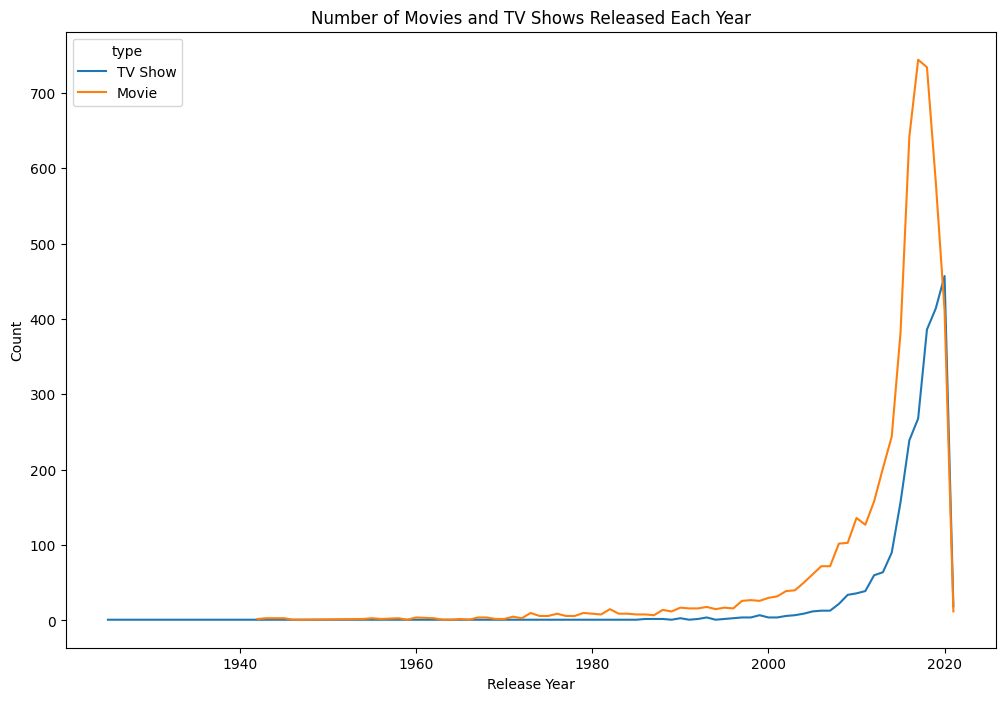

In [95]:
# Chart - 11 visualization code
# Grouping the data by release year and type, and count the number of shows
df_release_year = df.groupby(['release_year', 'type'])['show_id'].count().reset_index()

# Creating a figure for the plot with a specific size
plt.figure(figsize=(12, 8))

# Using seaborn's lineplot to visualize the relationship over time
sns.lineplot(data=df_release_year, x='release_year', y='show_id', hue='type')

# Setting chart title and labels
plt.title('Number of Movies and TV Shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected for its capacity to offer intriguing insights into the temporal distribution of movies and TV shows. It visually portrays the evolving trend in the annual release count for both content types, facilitating easy comparison. The color-coded lines for movies and TV shows enhance visual appeal and comprehension, making it an effective tool for examining the relationship between release year and content volume.

##### 2. What is/are the insight(s) found from the chart?

* We can glean insights from the annual count of movies and TV shows released, shedding light on the production trends in media content over the years.

* It's evident that the production of movies has witnessed substantial growth from the mid-2000s to 2020.

* While TV show production has also increased, it hasn't experienced the same magnitude of growth as movies.

* Furthermore, the chart notably depicts a decline in movie production in 2020, which could be attributed to the impact of the COVID-19 pandemic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights hold the potential for a positive business impact, benefiting content creators, streaming platforms, and investors. The surge in movie production may signal a consumer preference shift towards movies, guiding content creation and platform strategies.

However, the COVID-19 pandemic-induced decline in movie production could have adverse consequences, potentially resulting in reduced new content for streaming platforms and diminished revenue for content creators.

#### Chart - 12: How does the duration of titles relate to their type?

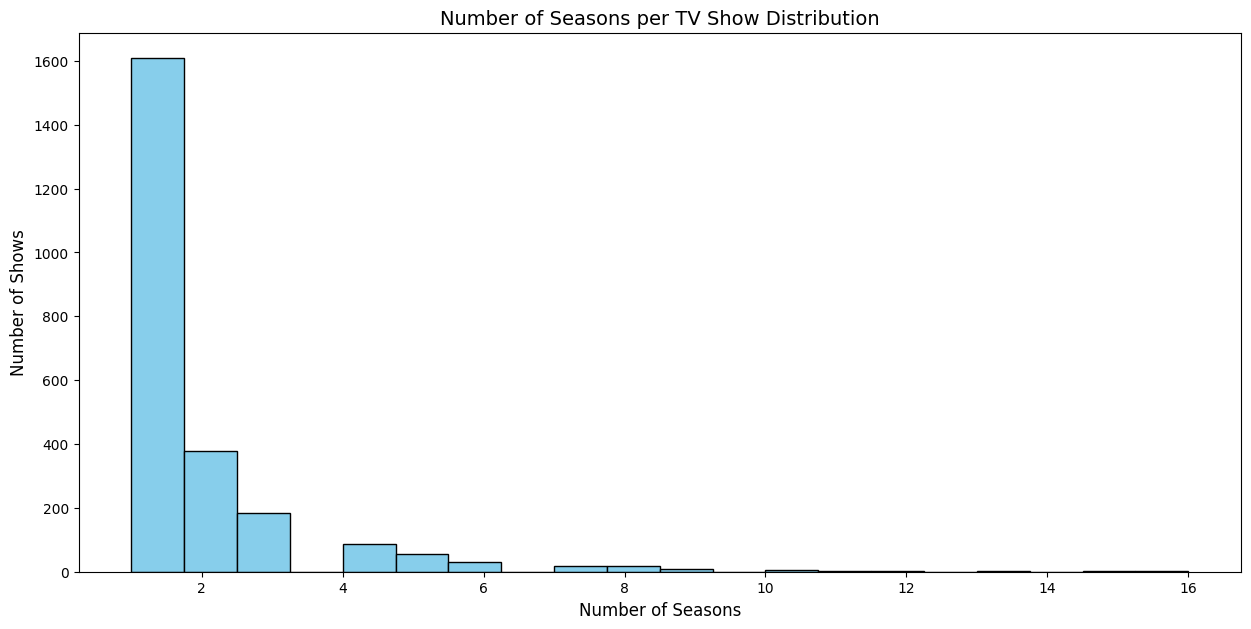

In [96]:
# Chart - 12 visualization code
# Filteing the dataframe to only include TV shows
tv_shows = df[df['type'] == 'TV Show']

# Creating a figure for the plot with a specific size
plt.figure(figsize=(15, 7))

# Creating a histogram of the number of seasons per TV show with 20 bins and black edge color
plt.hist(tv_shows['duration'], bins=20, edgecolor='black', color='skyblue')

# Adding labels and a title to the chart
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Number of Shows', fontsize=12)
plt.title('Number of Seasons per TV Show Distribution', fontsize=14)

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

This histogram visually represents the distribution of the number of seasons per TV show in the dataset. It offers insights into the prevalent TV show duration and the overall data distribution.

##### 2. What is/are the insight(s) found from the chart?

* The majority of TV shows consist of one to three seasons.

* TV shows with more than 10 seasons are infrequent but do exist.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* This insight can guide Netflix in determining the optimal number of seasons for new shows, indicating that shorter seasons may have greater popularity and success potential.

* It also serves as valuable input for negotiations with production companies regarding the length of TV shows.

### **Multivariate Analysis**

#### Chart - 13: Wordclouds

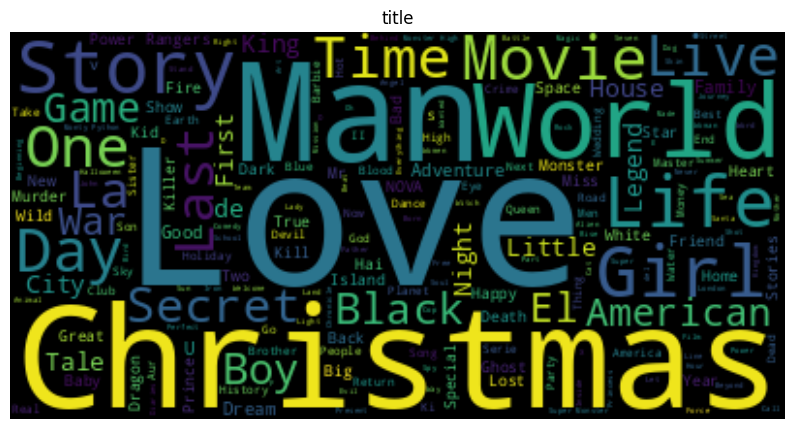

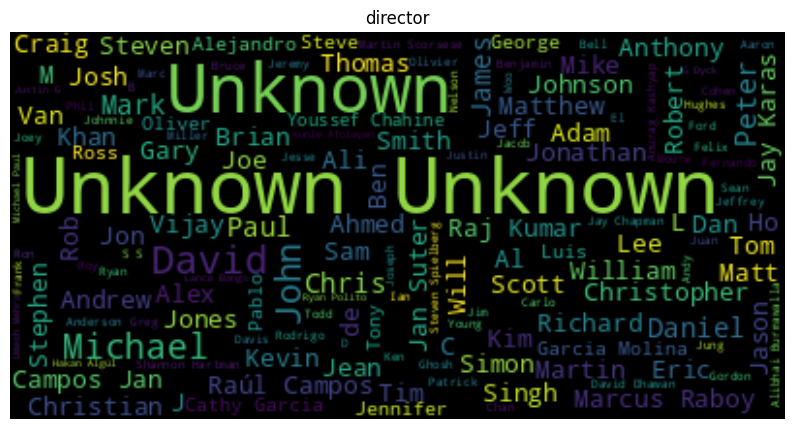

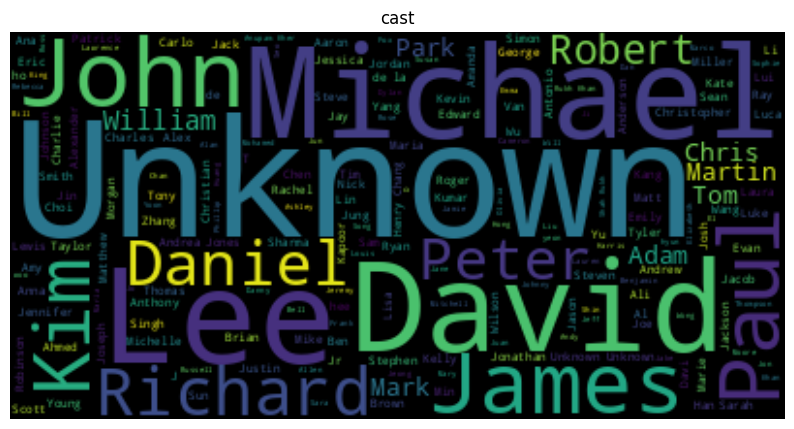

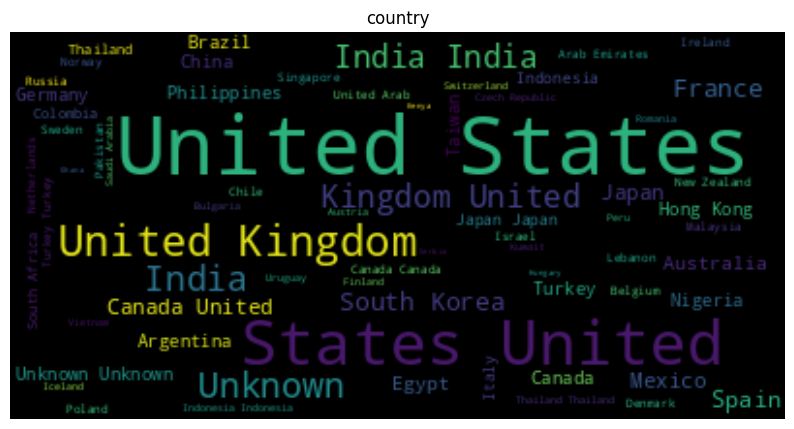

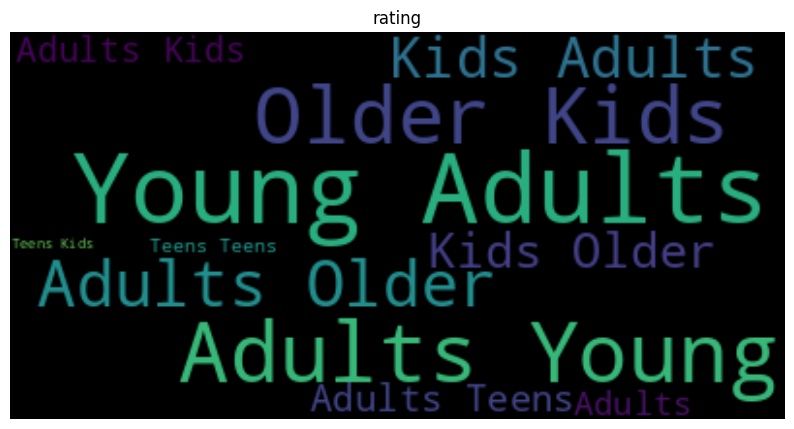

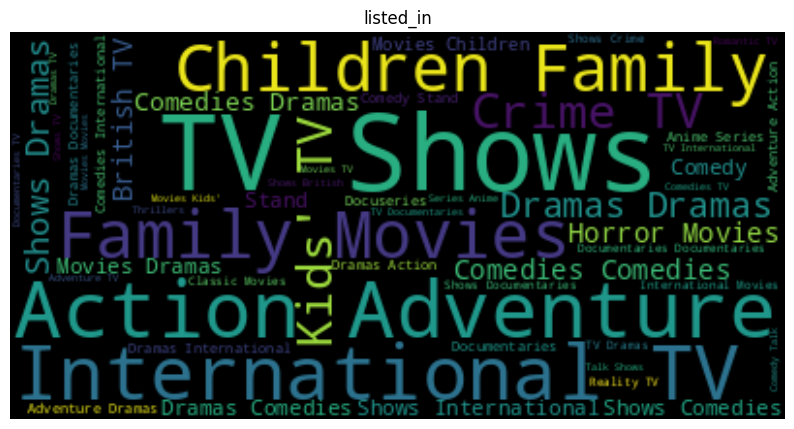

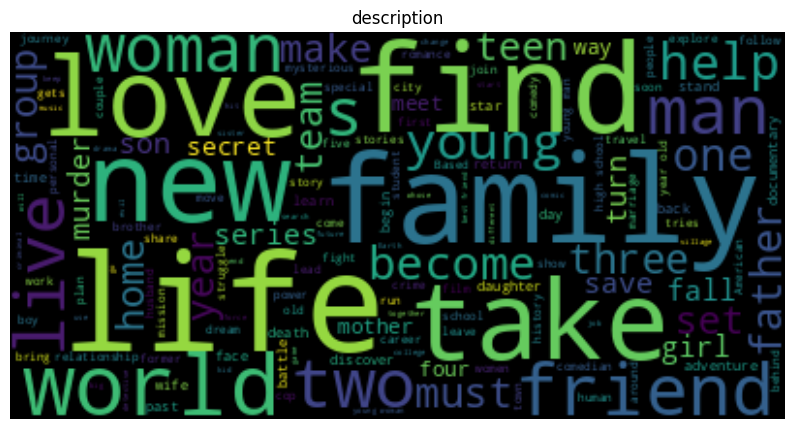

In [97]:
# Chart - 11 visualization code for wordcloud.

cat = ['title',	'director',	'cast',	'country', 'rating',	'listed_in'	,'description']
for i in df[cat]:
  text = " ".join(word for word in df[i])

  # creating the word cloud
  wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

  # plotting the word cloud
  plt.figure(figsize = (10,10))
  plt.imshow(wordcloud,  interpolation='bilinear')
  plt.title(i)
  plt.axis("off")
  plt.show()

##### 1. Why did you pick the specific chart?

The provided code creates a word cloud based on the descriptions of shows and movies in the Netflix dataset. This visualization is particularly effective for swiftly identifying the most frequently appearing words within the descriptions. It offers valuable insights into the prevalent themes and genres prevalent in Netflix's content library.

##### 2. What is/are the insight(s) found from the chart?

The insights derived from this chart encompass the identification of frequently occurring words and phrases within the descriptions. This knowledge aids in recognizing popular trends and subjects among users, potentially unveiling distinctive keywords or phrases suitable for marketing initiatives or targeting specific user segments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can contribute positively to Netflix's business impact by enhancing its understanding of user preferences. This understanding allows Netflix to align its content more effectively with user interests. By recognizing popular themes and genres, Netflix can refine its marketing strategies and elevate the overall user experience.

#### Chart - 14: Correlation Heatmap

<ipython-input-98-d8f1f5ecd5ec>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

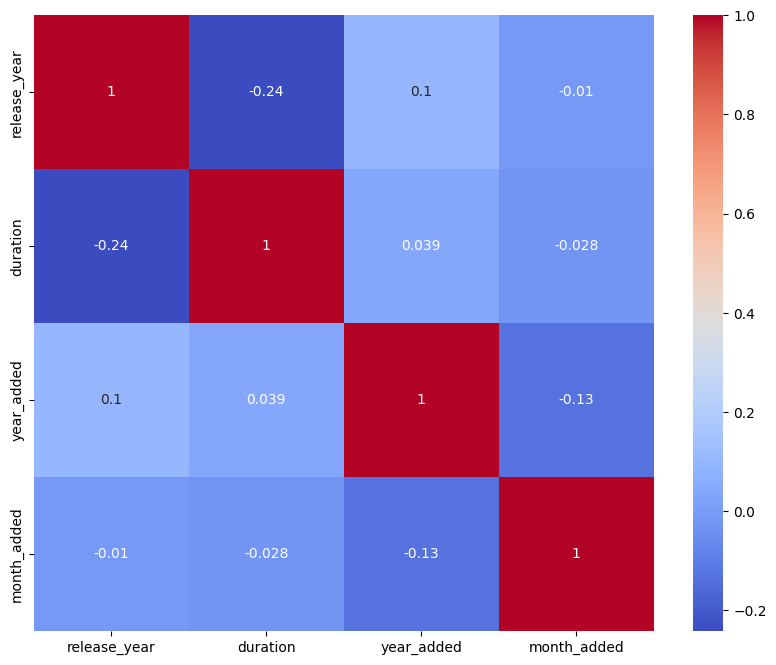

In [98]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

The heatmap visually illustrates the correlation coefficients among various numerical columns within the Netflix dataset.

To represent these coefficients, a color scale is employed, with light colors signifying positive correlations and dark colors indicating negative correlations. Additionally, the annotation parameter is enabled, displaying the correlation coefficient values within each cell of the heatmap.

##### 2. What is/are the insight(s) found from the chart?

This visualization serves as a valuable tool for discerning the magnitude and direction of relationships between various variables in the dataset. By scrutinizing the heatmap, we can identify variables with robust positive or negative correlations. This information is particularly useful for predictive modeling and machine learning endeavors.

In summary:

* There is a noticeable negative correlation of 24% between duration and release year.

* Conversely, there is a positive correlation of 10% between the year added and release year.

#### Chart - 15: Pair Plot

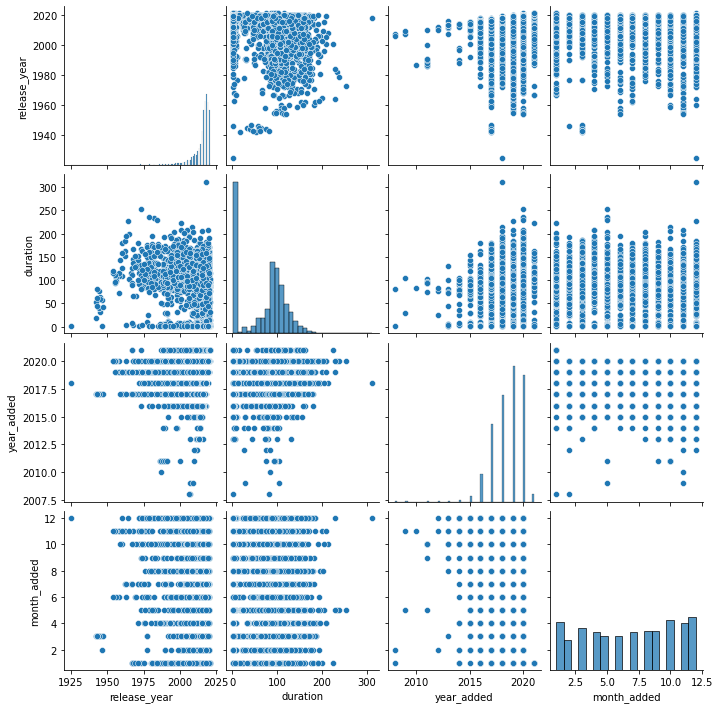

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot furnishes a matrix of scatter plots for all numerical variables within the dataset. Along the diagonal, it includes histograms, aiding in the visualization of relationships between every pair of variables.

##### 2. What is/are the insight(s) found from the chart?

* For each variable, the diagonal plots provide insights into their distribution, revealing their ranges and concentration patterns. In particular, the distribution of movie and TV show durations appears to cluster within specific ranges.

* In terms of variable relationships, the scatter plots and correlation coefficients in the upper-right corners offer an understanding of how variables correlate. Notably, there appears to be a positive correlation between the release year and the duration of movies and TV shows, implying that newer productions tend to be longer.

* The scatter plots also enable the identification of outliers within the dataset. Notably, there is a movie with an unusually extended duration compared to the rest of the dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [38]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [39]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [40]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [41]:
# Expand Contraction

#### 2. Lower Casing

In [42]:
# Lower Casing

#### 3. Removing Punctuations

In [43]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [44]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [45]:
# Remove Stopwords

In [46]:
# Remove White spaces

#### 6. Rephrase Text

In [47]:
# Rephrase Text

#### 7. Tokenization

In [48]:
# Tokenization

#### 8. Text Normalization

In [49]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [50]:
# POS Taging

#### 10. Text Vectorization

In [51]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [52]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [53]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [54]:
# Transform Your data

### 6. Data Scaling

In [55]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [56]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [57]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [58]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [59]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [62]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [63]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [64]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [67]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [68]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***